# This script demonstrates ___K-Means Clustering with MNIST___

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github: https://github.com/Eun0/Assignment

# Outline:

### 1. Load MNIST data
### 2. Create K-Means Algorithm

# import packages for plotting graphs and manipulating data :

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# Load image data and set initial value:

In [22]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# Define normalize(data) function:

normalize the values of the input data to be [0, 1]

In [23]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Transfer image data to vector form:

In [24]:
# one column means one image
list_image  = np.empty((size_row * size_col, num_image), dtype=float)

list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# Plot first 150 images with their labels

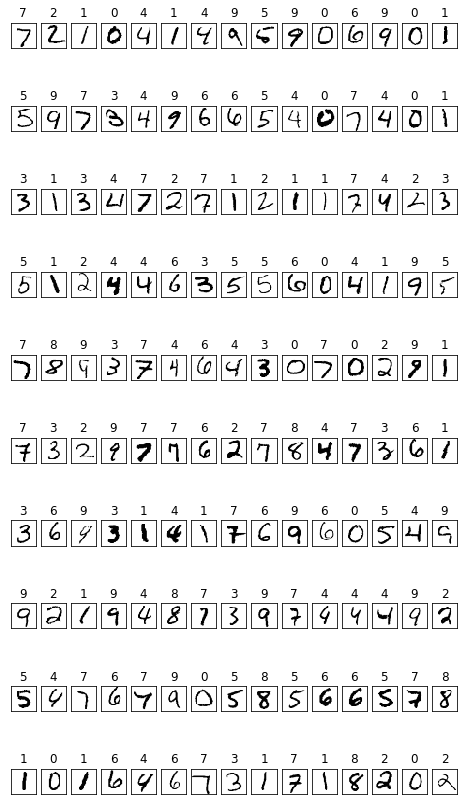

In [25]:
f1 = plt.figure(1,figsize=(8,15))

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    
plt.show()


# Pick k:

In [26]:
k=10

# Define computeDistance(img1,img2) function:

Compute (Euclidean) distance between two given vectors of image

In [27]:
def computeDistance(im_vector1,im_vector2):
    return np.linalg.norm(im_vector1-im_vector2)

# Define initializeLabel(k) function: 

(Randomly) Initialize labels of cluster

In [28]:
def initializeLabel(k):
    
    
    # Copy label and Shuffle! 
    list_clabel=copy.deepcopy(list_label)
    random.shuffle(list_clabel)
    
    return list_clabel

# Initialize cluster's Label

In [29]:
list_clabel=initializeLabel(k)

# Plot for visualizing cluster's label

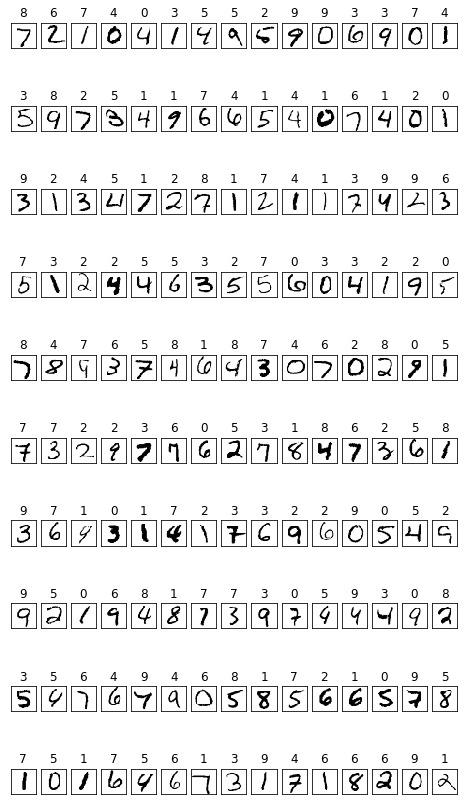

In [30]:
f2 = plt.figure(1,figsize=(8,15))

for i in range(150):

    clabel      = list_clabel[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(clabel)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


# Define computeCentroid(k) function:

Find centroid coordinates according to each cluster's label

In [31]:
def computeCentroid(k):
    
    # 'list_center' is a array which expects centers of clusters
    
    # Initialize list_center with zeros
    list_center=np.zeros((size_row * size_col, k))

    for i in range(k):
        
        # Pick columns whose list_clabel is i
        imgs_sel=list_image[:,list_clabel==i]
        
        # Compute mean of the columns => centeroid
        imgs_mean=np.mean(imgs_sel,axis=1)
        list_center[:,i]=imgs_mean
        
    return list_center


# Compute centroid

In [32]:
list_center=computeCentroid(k)

# Plot inital centroid

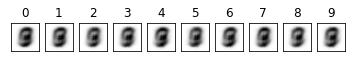

In [33]:
f3 = plt.figure(1)

for i in range(k):

    clabel      = i
    im_vector   = list_center[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(1, 10, i+1)
    plt.title(clabel)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Define makeDistances() function:

Make a array which consists of distance between data and center of cluster

In [34]:
def makeDistances():
    
    # 'list_distance' array contains distance information
    list_distance=np.zeros((num_image,k))
    
    for i in range(num_image):
        
        img_vec=list_image[:,i]
    
        for j in range(k):
            
            
            # Center of cluster labeled j
            center=list_center[:,j]
            
            # Assign distance information to 'list_distance' array
            # list_distance[i,j]=distance between ith image vector and jth centroid
            list_distance[i,j]=computeDistance(img_vec,center)
            
    return list_distance

# Make distance matrix

In [35]:
list_distance=makeDistances()

# Define assignLabel(k,list_distance) function:

Assign label,whose value in 'list_distance' is minimun 

In [36]:
def assignLabel(k,list_distance):
    
    global list_clabel
    global list_label

    for i in range(num_image):
        
        # Find label which has a minimum distance
        clabel=np.argmin(list_distance[i])
        # Assign label
        list_clabel[i]=int(clabel)


# Define assignName():

Give meaningful label,called 'name', to cluster for accuracy check

### How to give name

1. Count each real labels of image in same cluster and  Store real label(=name) who has greatest number to 'max_label'

max_label:

 - row: cluster
  
 - col: name,number of name in cluster,integer for check (0 means not labeled by name,1 means already labeled by name)

2. Find same name in max_label 

  if not exists =>label name to the cluster 

  if exist => compare number of name in cluster and label name to the biggest one
  
3. If cluster yet did not labeled by name, assign name not used randomly


In [37]:
def assignName():
    
    global list_center
    
    # 'list_name' contains name(=meaningful label)
    list_name=np.empty(num_image,dtype=int)
    max_label=[]
    
    # Make max_label
    for i in range(k):
        label_sel=list_label[list_clabel==i]
        (clabel, counts) = np.unique(label_sel, return_counts=True)
        ind=np.argmax(counts)
        max_label.append([clabel[ind],counts[ind],0])
   
    max_label=np.array(max_label)
    
    # For checking not used name (0 means not used,1 means used)
    labeled_name=[0 for i in range(k)]
    
    
    # Label name
    for i in range(k):
        indx=np.where(max_label[:,0]==i)
        if indx[0].size!=0:
            max_count=max_label[(indx[0][0])][1]
            max_ind=0
            for j in range(len(indx[0])):
                if max_count<max_label[(indx[0][j])][1]:
                    max_count=max_label[(indx[0][j])][1]
                    max_ind=j
            cluster=indx[0][max_ind]
            list_name[list_clabel==cluster]=max_label[cluster][0]
            max_label[cluster][2]=1
            labeled_name[i]+=1
            # swap
            list_center[i],list_center[cluster]=list_center[cluster],list_center[i]
    
    
    # For yet not named cluster
    labeled_name=np.array(labeled_name)
    indl=np.where(max_label[:,2]==0)
    indl2=np.where(labeled_name==0)
    
    for i in range(len(indl[0])):
        list_name[list_clabel==indl[0][i]]=indl2[0][i]
        max_label[indl[0][i]][2]=1
        list_center[indl[0][i]],list_center[indl2[0][i]]=list_center[indl2[0][i]],list_center[indl[0][i]]
    
    return list_name

# Define computeEnergy(list_image,list_clabel) function:

Our Goal is minimizing Energy

Energy is mean of distances between data and center of cluster which data belongs to

In [38]:
def computeEnergy(list_image,list_clabel):
    
    sum=0
    
    for i in range(num_image):
        
        # Center of cluster which data belongs to
        label=int(list_clabel[i])
        center=list_center[label]
        
        distance=list_distance[i,label]
        
        sum+=distance
        
    return sum/(num_image)

# Define computeAccuracy(list_label,name_list):

Compute accuracy

In [39]:
def computeAccuracy(list_label,name_list):
    acc=0
    for i in range(num_image):
        if(name_list[i]==list_label[i]):
            acc+=1
    
    acc=acc/num_image
    print("acc:"+str(acc))
    return acc

# Create K-Means Algorithm and Compute Energy

In [40]:
# Calculate initial energy
energy = []
erg = computeEnergy(list_image,list_clabel)
print('Energy :', erg)
energy.append(erg)

j=0

while(1): 
   
    
    
    list_distance=makeDistances()
    
    assignLabel(k,list_distance)
    #list_clabel=assignName()
    list_name=assignName()
    acc=computeAccuracy(list_label,list_name)

    new_center_exp=computeCentroid(k)
          
    if np.array_equal(list_center,new_center_exp):
        break
    
    else:
        np.copyto(list_center,new_center_exp)
        
        # Calculate energy
        erg = computeEnergy(list_image,list_clabel)
        print('Energy :', erg)
        energy.append(erg)
    
    if j==49:
        print(j)
    j+=1
        

Energy : 7.205664975932827
acc:0.2884
Energy : 7.145936248377111
acc:0.4266
Energy : 6.483793999924688
acc:0.4869
Energy : 6.314252590639858
acc:0.4747
Energy : 6.2501649257934995
acc:0.4936
Energy : 6.2132122887908725
acc:0.5189
Energy : 6.192314170110239
acc:0.5304
Energy : 6.183576368878919
acc:0.5383
Energy : 6.180758694997764
acc:0.5426
Energy : 6.179781057278899
acc:0.5477
Energy : 6.179256279393024
acc:0.5526
Energy : 6.178981807884641
acc:0.5572
Energy : 6.178597145324589
acc:0.5613
Energy : 6.1780055263307965
acc:0.5669
Energy : 6.177224721040617
acc:0.5715
Energy : 6.176225935643179
acc:0.5767
Energy : 6.175035100753807
acc:0.5813
Energy : 6.173682905070271
acc:0.5848
Energy : 6.172760448902249
acc:0.586
Energy : 6.172355977552716
acc:0.587
Energy : 6.172163968794744
acc:0.5883
Energy : 6.172066908192757
acc:0.5889
Energy : 6.171850804984603
acc:0.5896
Energy : 6.17176802558838
acc:0.5903
Energy : 6.171654175559997
acc:0.5908
Energy : 6.171554870085873
acc:0.5916
Energy : 6.1

# Result

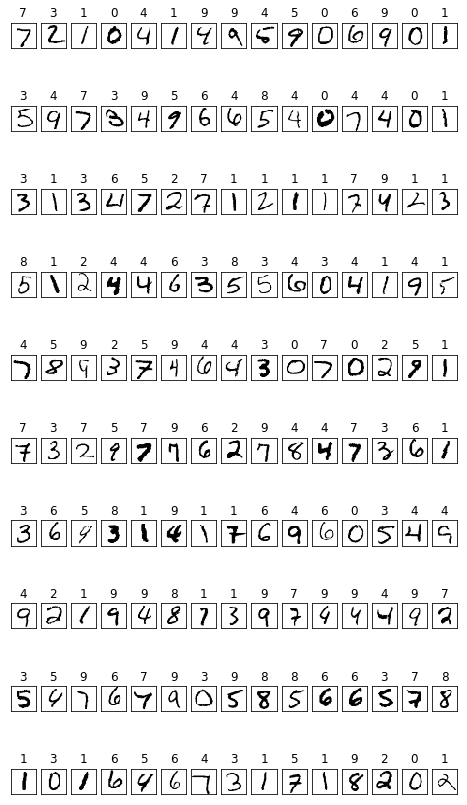

In [41]:

f4 = plt.figure(1,figsize=(8,15))

for i in range(150):

    clabel      = list_name[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(clabel)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


# Plot the Energy

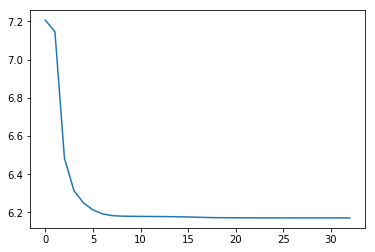

In [42]:
plt.plot(energy)


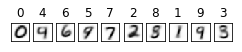

In [43]:
f1 = plt.figure(1)



for i in range(k):

    label       = list_name[list_clabel==i][0]
    im_vector   = list_center[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()